# City Blocks

This notebook shows how we can properly build city blocks for urban areas. City blocks are the areas surrounded by streets. We use the OpenStreetMap to get the road network of an area.

To run this notebook, in addition to `tesspy`, you need `contextily` for basemap visualization. This package is only used to enhance visualization and has no effect on tessellation.

## Area

We use the city of **Liverpool** in the United Kingdom as a case study.

In [1]:
from tesspy import Tessellation
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,8)
import contextily as ctx
from time import sleep

In [2]:
# Create a tessellation object
liverpool=Tessellation('Liverpool, United Kingdom')

# get polygon of the investigated area
liverpool_polygon = liverpool.get_polygon()

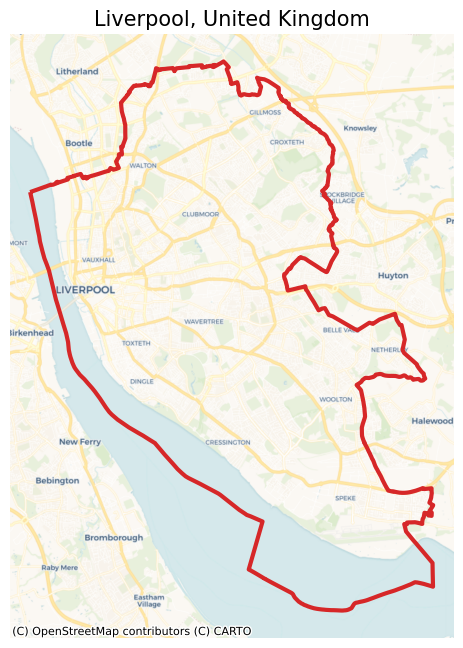

In [14]:
# visualization of area
ax= liverpool_polygon.to_crs('EPSG:3857').plot(facecolor='none', edgecolor='tab:red',lw=3)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title('Liverpool, United Kingdom', fontsize=15)
plt.show()

## Street types

There are different types of streets defined by the OSM. We have listed this from top-level to low-level. This list can be seen by using the static method `.osm_highway_types()`. By using the keyword `detail_deg`, we can specify how detailed we want to get road network data from the OSM starting from the top category of the list. `detail_deg` can be between 1 and 19.

In [12]:
liverpool.osm_highway_types()

['motorway',
 'trunk',
 'primary',
 'secondary',
 'tertiary',
 'residential',
 'unclassified',
 'motorway_link',
 'trunk_link',
 'primary_link',
 'secondary_link',
 'living_street',
 'pedestrian',
 'track',
 'bus_guideway',
 'footway',
 'path',
 'service',
 'cycleway']

For example, for a rough tessellation we can use only the top 5 road (highway) types which are: `motorway`, `trunk`, `primary`, `secondary`, and `tertiary`.

In [20]:
liverpool_cb_deg5 = liverpool.city_blocks(n_polygons=None, detail_deg=5)

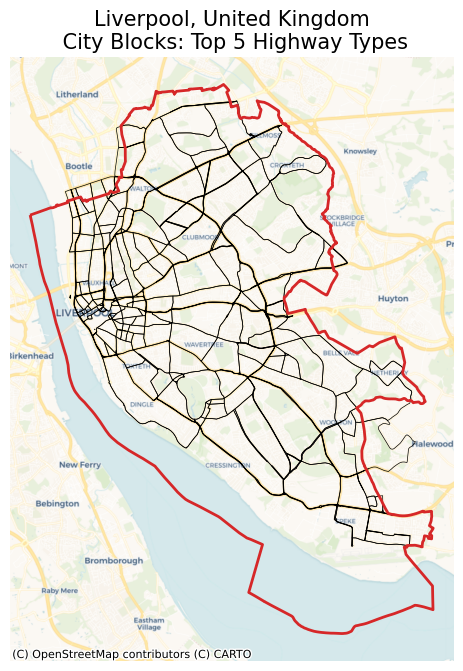

In [21]:
ax= liverpool_cb_deg5.to_crs('EPSG:3857').plot(facecolor='none', edgecolor='k', lw=0.5)
liverpool_polygon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='tab:red',lw=2)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title('Liverpool, United Kingdom\n City Blocks: Top 5 Highway Types', fontsize=15)
plt.show()

## Creating city blocks


If we use most of the road network data, we end up with many small polygons. Some of which are not even meaningful, e.g., traffic islands. Therefore, we cluster the small polygons (using hierarchical clustering) and merge them into larger polygons. This way, we can generate more realistic city blocks. In addition, we can generate an arbitrary number of city blocks by tuning the number of clusters by `n_polygons`.

If we only use the top-level road types, we may not need to cluster the polygons. In this case, as seen above, we can pass `None` to `n_polygons`.

In the first example, we can use all the road data to generate city blocks without clustering or merging them. First, let's see how many polygons it creates and what it looks like:

In [22]:
liverpool_cb_all = liverpool.city_blocks()

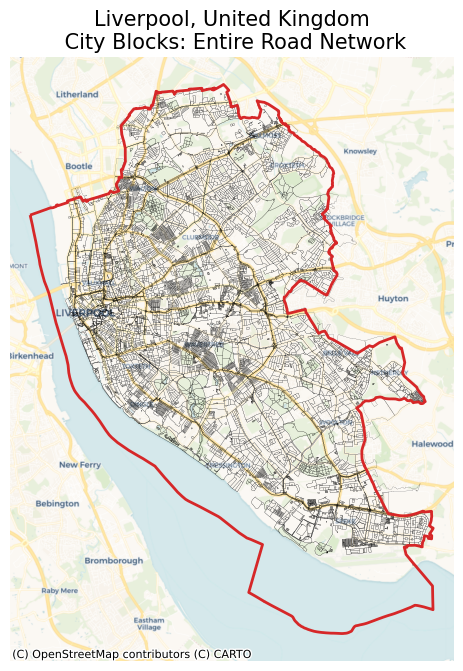

In [25]:
ax= liverpool_cb_all.to_crs('EPSG:3857').plot(facecolor='none', edgecolor='k', lw=0.1)
liverpool_polygon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='tab:red',lw=2)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title('Liverpool, United Kingdom\n City Blocks: Entire Road Network\nAll Polygons', fontsize=15)
plt.show()

In [27]:
print('Number of polygons: ' ,len(liverpool_cb_all))

Number of polygons:  11868


This resulted in more than 10,000 polygons. So it makes sense to cluster and merge these polygons. With repeat the same process. This time we set `n_polygons` to be 500:

In [29]:
liverpool_cb_all_500 = liverpool.city_blocks(n_polygons=500)

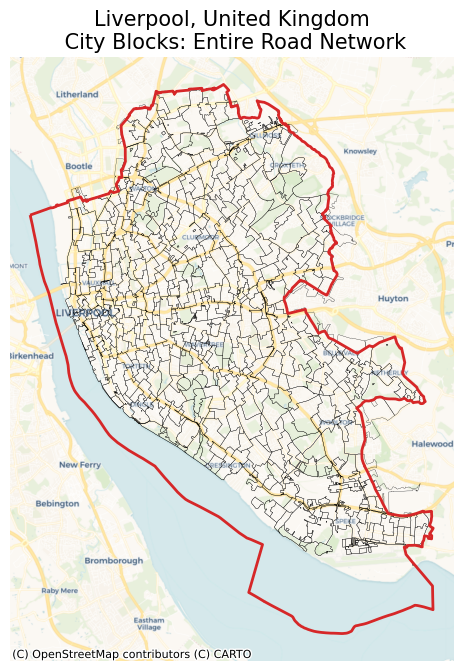

In [35]:
ax= liverpool_cb_all_500.to_crs('EPSG:3857').plot(facecolor='none', edgecolor='k', lw=0.2)
liverpool_polygon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='tab:red',lw=2)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title(f'Liverpool, United Kingdom'
              'City Blocks: Entire Road Network'
             f'nClustered: {len(liverpool_cb_all_500)} Polygons', fontsize=15)
plt.show()

These polygons look much better. We can use these in further spatial analyses.

To see the difference more clearly, we investigate a small cross-section of Liverpool:

In [54]:
# Create a tessellation object
ev=Tessellation('Everton, Liverpool, UK')

# get polygon of the investigated area
ev_polygon = ev.get_polygon()

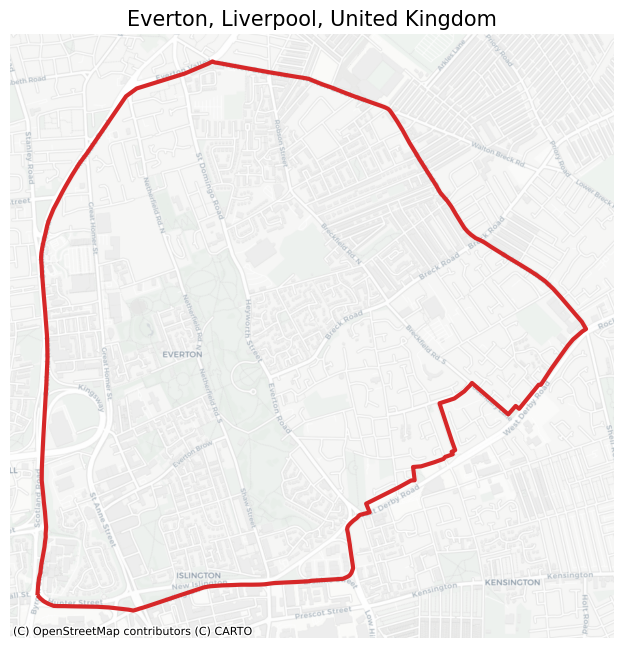

In [62]:
# visualization of area
ax= ev_polygon.to_crs('EPSG:3857').plot(facecolor='none', edgecolor='tab:red',lw=3)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
ax.set_title('Everton, Liverpool, United Kingdom', fontsize=15)
plt.show()

In [60]:
ev_cb_all = ev.city_blocks()
ev_cb_all_100 = ev.city_blocks(n_polygons=100)

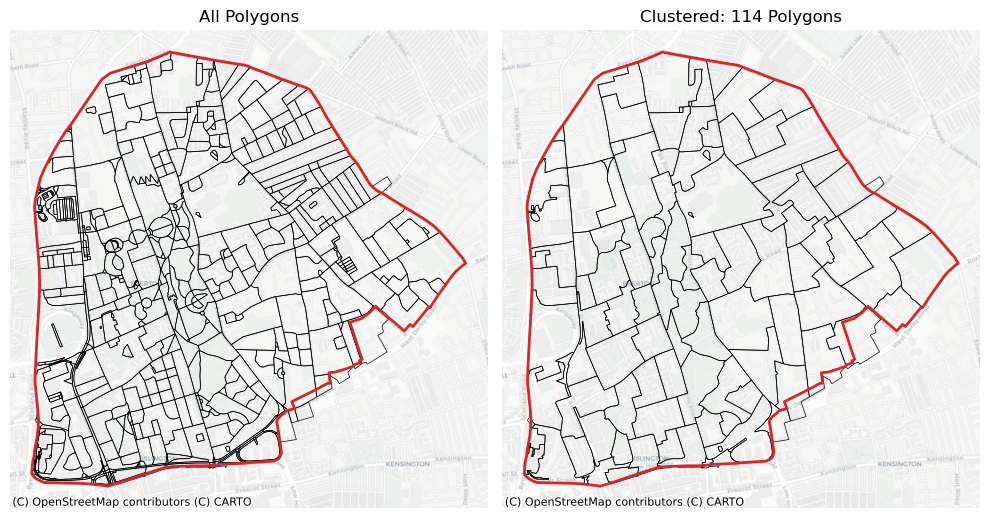

In [61]:
fig, axs= plt.subplots(1,2 , figsize=(10,6))

ev_cb_all.to_crs('EPSG:3857').plot(ax=axs[0], facecolor='none', edgecolor='k', lw=0.5)
ev_cb_all_100.to_crs('EPSG:3857').plot(ax=axs[1], facecolor='none', edgecolor='k', lw=0.5)

axs[0].set_title(f'All Polygons')
axs[1].set_title(f'Clustered: {len(ev_cb_all_100)} Polygons')

for ax in axs.flatten():
    ax.set_axis_off()
    ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Positron)
    ev_polygon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='tab:red',lw=2)
    
plt.tight_layout()